In [15]:
import pandas as pd
import numpy as np
import psycopg2

In [16]:
#Connect to db
dbname = 'beforeiagree_db'
username = 'peterostendorp'

#Create engine
con = psycopg2.connect(database = dbname, user = username)

In [17]:
#Get annotations table
sql = """
SELECT * FROM annotations;
"""
annotations = pd.read_sql_query(sql,con)

In [18]:
#Get the pretty strings table
sql = """
SELECT * FROM pretty_strings;
"""

pretty_strings = pd.read_sql_query(sql,con)

## Find pretty strings for different policy types

**Unique category names**
'Other'
'First Party Collection/Use', 
'Data Retention',
'International and Specific Audiences', 
'User Choice/Control',
'Third Party Sharing/Collection', 
'User Access, Edit and Deletion',
'Policy Change', 
'Data Security',
'Do Not Track'

**Unique segment attribute names**
'Other Type'
'Do Not Track policy'
'Retention Period'
'Personal Information Type'
'Security Measure'
'Access Scope'
'Access Type'
'Collection Mode'
'Does/Does Not'
'Choice Type'
'Identifiability'
'Action First-Party'
'User Choice'
'User Type'
'Choice Scope'
'Change Type'
'Notification Type'
'Purpose'
'Third Party Entity'
'Action Third Party'
'Audience Type'
'Retention Purpose'

In [19]:
#First squish pretty and annotations together
pretty = pd.merge(annotations,pretty_strings,how='inner',on='annotation_id')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

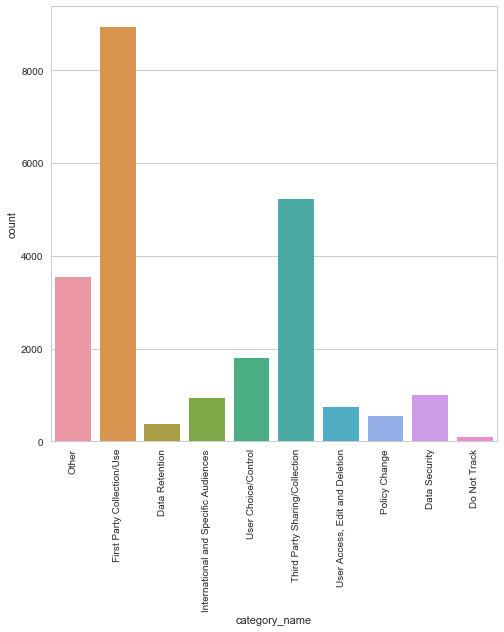

In [26]:
#How many policy statements of each type are made throughout?
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
ax = sns.countplot(pretty['category_name'])
ax.set_xticklabels(ax.get_xmajorticklabels(),rotation='vertical')

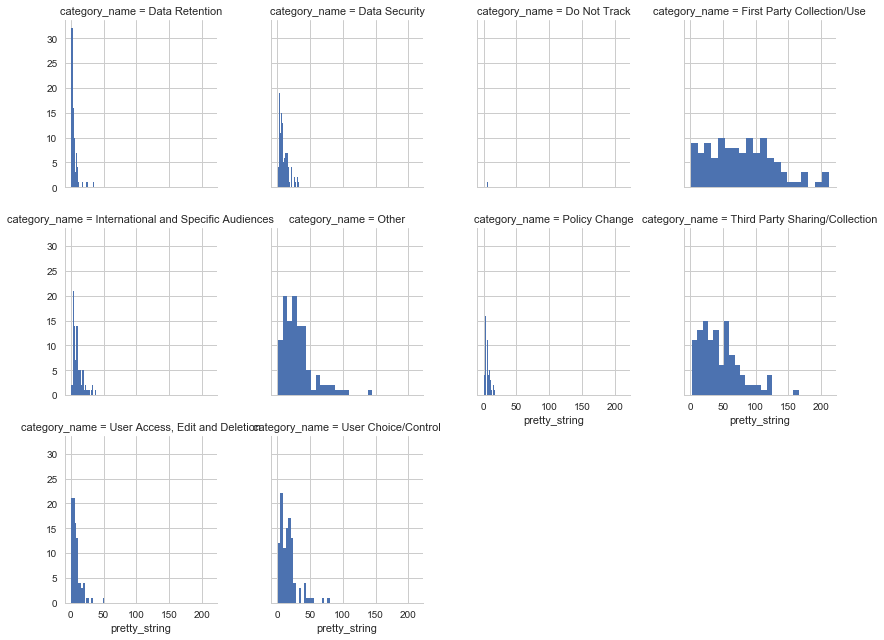

In [43]:
#For each unique policy ID, what is the number of statements made about each category?
cat_counts_by_pid = pretty.groupby(['Policy UID','category_name']).count().reset_index(level=-1)
g = sns.FacetGrid(data = cat_counts_by_pid,col='category_name',col_wrap=4)
g.map(plt.hist,'pretty_string',bins=20)

## Exporting pretty strings associated with each category into .csvs

In [13]:
#Set up a for loop to cycle through the policies
categories = ['First Party Collection/Use','Data Retention','Third Party Sharing/Collection',
            'User Access, Edit and Deletion','Policy Change','Data Security','Do Not Track']

for cat in categories:
    pretty[pretty['category_name']==cat]['pretty_string'].to_csv('../OPP-115/pretty_print/' + cat.replace('/','-') + '_strings.csv')